<a href="https://colab.research.google.com/github/PRATIK-HUB1/AI_Final_Portfolio_Project/blob/main/2548392_Pratik_Shah_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CELL 1 — Import Required Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Feature selection
from sklearn.feature_selection import RFE


##CELL 2 — Load the Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Co2_Emissions_by_Sectors.csv")


##CELL 3 — Initial Data Inspection

In [3]:
df.head()

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,Construction,North America,Brazil,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,Mining,Europe,Germany,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30
2,Manufacturing,South America,South Africa,2017,179.72,255.14,55.36,111.67,1.25,4.97,522.75,24523.17,65.22,5.91,-9.88,4.77
3,Construction,Europe,India,2018,23.28,887.29,78.99,123.60,46.81,13.77,1304.60,12616.18,23.69,7.52,-0.64,8.21
4,Construction,Africa,China,2013,124.54,923.03,65.93,52.32,35.67,13.91,1437.68,4476.00,94.64,8.54,5.98,0.84


In [4]:
df.shape

(17686, 16)

In [5]:
df.columns

Index(['Industry_Type', 'Region', 'Country', 'Year',
       'Co2_Emissions_MetricTons', 'Energy_Consumption_TWh',
       'Automobile_Co2_Emissions_MetricTons',
       'Industrial_Co2_Emissions_MetricTons',
       'Agriculture_Co2_Emissions_MetricTons',
       'Domestic_Co2_Emissions_MetricTons', 'Population_Millions',
       'GDP_Billion_USD', 'Urbanization_Percentage',
       'Renewable_Energy_Percentage', 'Industrial_Growth_Percentage',
       'Transport_Growth_Percentage'],
      dtype='object')

##CELL 4 — Dataset Information & Data Types

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Industry_Type                         17686 non-null  object 
 1   Region                                17686 non-null  object 
 2   Country                               17686 non-null  object 
 3   Year                                  17686 non-null  int64  
 4   Co2_Emissions_MetricTons              17686 non-null  float64
 5   Energy_Consumption_TWh                17686 non-null  float64
 6   Automobile_Co2_Emissions_MetricTons   17686 non-null  float64
 7   Industrial_Co2_Emissions_MetricTons   17686 non-null  float64
 8   Agriculture_Co2_Emissions_MetricTons  17686 non-null  float64
 9   Domestic_Co2_Emissions_MetricTons     17686 non-null  float64
 10  Population_Millions                   17686 non-null  float64
 11  GDP_Billion_USD

##CELL 5 — Summary Statistics

In [7]:
df.describe()


,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,2011.024935,150.331667,500.071501,49.983267,99.975617,24.895109,10.170034,752.966182,12522.789595,60.039285,49.916005,2.570492,2.471663
std,6.657483,86.401588,287.008603,28.936346,57.630602,14.422553,5.757755,432.819846,7184.289404,23.131004,28.962171,7.229444,4.338840
min,2000.000000,0.500000,0.630000,0.110000,0.110000,0.100000,0.100000,0.510000,0.220000,20.010000,0.000000,-10.000000,-5.000000
25%,2005.000000,75.580000,252.447500,24.712500,49.550000,12.390000,5.160000,377.497500,6392.367500,39.802500,24.730000,-3.727500,-1.280000
50%,2011.000000,150.820000,499.645000,50.305000,100.385000,24.820000,10.200000,750.400000,12491.915000,60.260000,50.000000,2.500000,2.470000
75%,2017.000000,225.247500,750.065000,75.200000,149.867500,37.310000,15.190000,1126.875000,18664.797500,80.030000,75.057500,8.770000,6.230000
max,2022.000000,299.990000,999.880000,100.000000,200.000000,50.000000,20.000000,1499.830000,24999.570000,100.000000,100.000000,15.000000,10.000000


##CELL 6 — Missing Value Analysis

In [8]:
df.isnull().sum()


,0
Industry_Type,0
Region,0
Country,0
Year,0
Co2_Emissions_MetricTons,0
Energy_Consumption_TWh,0
Automobile_Co2_Emissions_MetricTons,0
Industrial_Co2_Emissions_MetricTons,0
Agriculture_Co2_Emissions_MetricTons,0
Domestic_Co2_Emissions_MetricTons,0


##CELL 7 — Duplicate Check

In [9]:
df.duplicated().sum()


np.int64(0)

##CELL 8 — Convert columns to numeric

In [10]:
# Convert all columns except Year to numeric
for col in df.columns:
    if col != "Year":
        df[col] = pd.to_numeric(df[col], errors="coerce")


##CELL 9 — Handle newly created NaNs

In [11]:
df.isnull().sum()


,0
Industry_Type,17686
Region,17686
Country,17686
Year,0
Co2_Emissions_MetricTons,0
Energy_Consumption_TWh,0
Automobile_Co2_Emissions_MetricTons,0
Industrial_Co2_Emissions_MetricTons,0
Agriculture_Co2_Emissions_MetricTons,0
Domestic_Co2_Emissions_MetricTons,0


In [12]:
df = df.fillna(df.median(numeric_only=True))


##CELL 10 — Create Total_CO2

In [13]:
df["Total_CO2"] = df.drop(columns=["Year"]).sum(axis=1)
target_column = "Total_CO2"


In [14]:
df[["Year", "Total_CO2"]].head()


,Year,Total_CO2
0,2010,14540.23
1,2006,27137.70
2,2017,25720.05
3,2018,15133.30
4,2013,7239.08


##CELL 11 — Duplicate Record Check & Removal

In [15]:
# Check for duplicate rows
df.duplicated().sum()


np.int64(0)

In [16]:
df = df.drop_duplicates()
df.shape


(17686, 17)

##CELL 12 — Outlier Detection & Treatment

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ~(
    (df < (Q1 - 1.5 * IQR)) |
    (df > (Q3 + 1.5 * IQR))
).any(axis=1)

df = df[outlier_mask]


In [18]:
df.shape


(17686, 17)

##CELL 13 — Target Variable Distribution

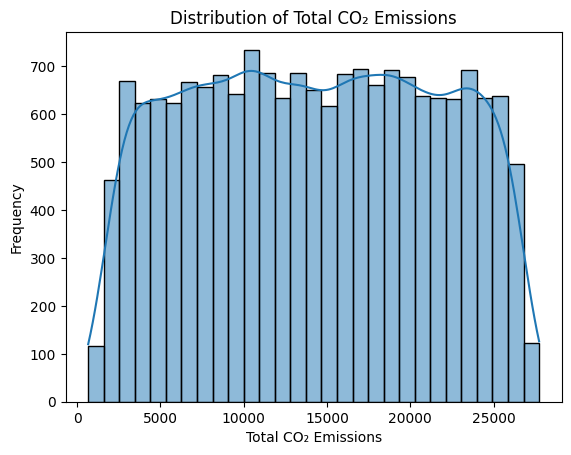

In [19]:
plt.figure()
sns.histplot(df[target_column], kde=True)
plt.title("Distribution of Total CO₂ Emissions")
plt.xlabel("Total CO₂ Emissions")
plt.ylabel("Frequency")
plt.savefig("target_distribution.png")
plt.show()


##CELL 14 — Boxplot (Outlier Verification)

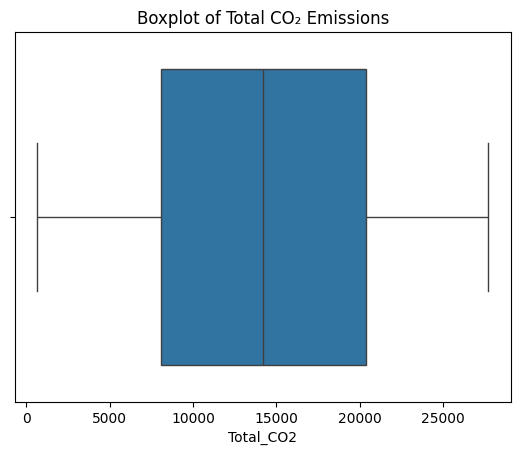

In [20]:
plt.figure()
sns.boxplot(x=df[target_column])
plt.title("Boxplot of Total CO₂ Emissions")
plt.savefig("boxplot.png")
plt.show()


##CELL 15 — Correlation Heatmap

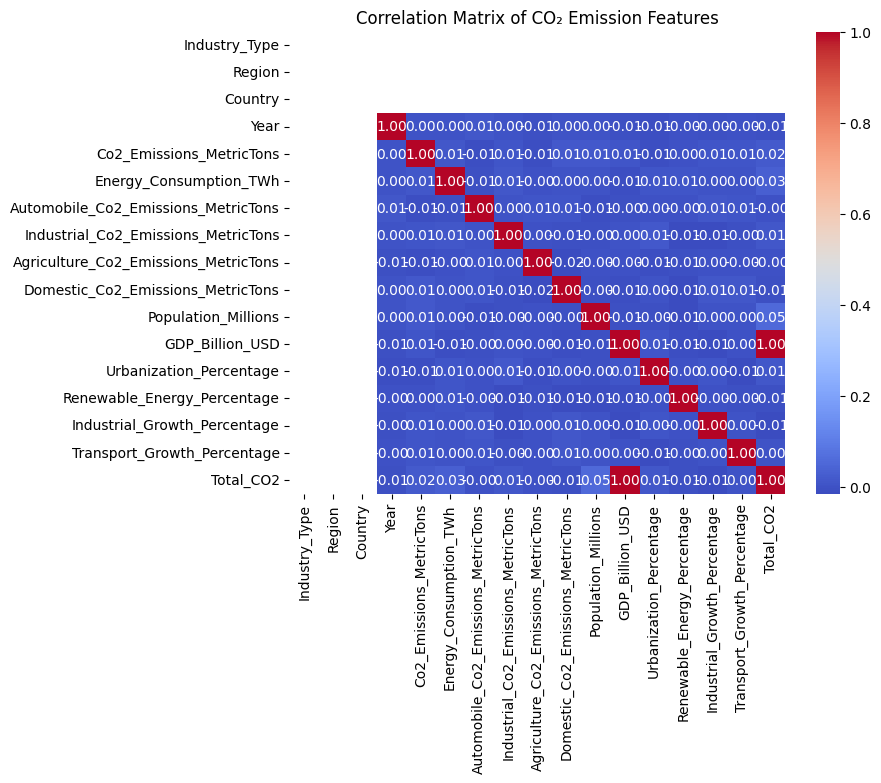

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix of CO₂ Emission Features")
plt.savefig("correlation_heatmap.png")
plt.show()



##CELL 16 — Final Feature–Target Separation

In [22]:
X = df.drop(columns=[target_column])
y = df[target_column]

X.shape, y.shape


((17686, 16), (17686,))

##CELL 17 — Train/Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [24]:
X_train.shape, X_test.shape


((14148, 16), (3538, 16))

##CELL 18A — Remove Zero-Variance Features

In [25]:
# Identify columns with zero variance
zero_variance_cols = X_train.loc[:, X_train.nunique() <= 1].columns

zero_variance_cols


Index(['Industry_Type', 'Region', 'Country'], dtype='object')

In [26]:
X_train = X_train.drop(columns=zero_variance_cols)
X_test = X_test.drop(columns=zero_variance_cols)


##CELL 18 — Feature Scaling

In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##CELL 19 — Build Neural Network Regressor (MLP)

In [28]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)


##CELL 20 — Train Neural Network

In [29]:
mlp.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

##CELL 21 — Evaluate Neural Network

In [30]:
y_pred_mlp = mlp.predict(X_test_scaled)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

mae_mlp, mse_mlp , rmse_mlp, r2_mlp


(1.2431946367370548,
 6.449108540333334,
 np.float64(2.539509507824953),
 0.9999998779983289)

##CELL 22 — Linear Regression Model

In [31]:
lr = LinearRegression()


##CELL 23 — Train Linear Regression

In [32]:
lr.fit(X_train_scaled, y_train)


LinearRegression()

##CELL 24 — Evaluate Linear Regression

In [33]:
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, mse_lr, rmse_lr, r2_lr


(4.174826177870412e-12,
 2.816308661410521e-23,
 np.float64(5.306890484465005e-12),
 1.0)

##CELL 25 — Random Forest Regressor

In [34]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)


##CELL 26 — Train Random Forest

In [35]:
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

##CELL 27 — Evaluate Random Forest

In [36]:
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf,mse_rf, rmse_rf, r2_rf


(106.24565414075731,
 17670.54077405828,
 np.float64(132.93058629998697),
 0.999665715735863)

##CELL 28 — Initial Model Comparison

In [37]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "MSE": [mse_lr, mse_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

comparison_df


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,4.174826e-12,2.816309e-23,5.306890e-12,1.000000
1,Random Forest,1.062457e+02,1.767054e+04,1.329306e+02,0.999666


##CELL 29 — Hyperparameter Tuning for Linear Model (Ridge Regression)

Import Ridge

In [38]:
from sklearn.linear_model import Ridge


Define parameter grid





In [39]:
ridge = Ridge()

param_grid_ridge = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}


##GridSearch with Cross-Validation

In [40]:
ridge_cv = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring="r2"
)

ridge_cv.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

##Best parameters & CV score

In [41]:
ridge_cv.best_params_, ridge_cv.best_score_


({'alpha': 0.01}, np.float64(0.999999999999216))

##CELL 30 — Hyperparameter Tuning for Random Forest

Define parameter grid

In [42]:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}


Reduced Grid

In [43]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 20],
    "min_samples_split": [2, 5]
}


Randomized Hyperparameter Search

In [44]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,          # only 10 combinations
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2')

In [45]:
rf_random.best_params_, rf_random.best_score_


({'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20},
 np.float64(0.9996105900155257))

##CELL 31 — Cross-Validation Score Comparison

In [48]:
cv_comparison = pd.DataFrame({
    "Model": ["Ridge Regression", "Random Forest"],
    "Best CV R2 Score": [
        ridge_cv.best_score_,
        rf_random.best_score_
    ]
})

cv_comparison


,Model,Best CV R2 Score
0,Ridge Regression,1.000000
1,Random Forest,0.999611


##CELL 32 — Feature Selection for Linear Model (RFE with Ridge)

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge


In [50]:
# Rebuild Ridge with best alpha from CV
ridge_best = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Select top-k features (choose ~70% of features)
n_features_to_select = max(1, int(0.7 * X_train.shape[1]))

rfe_ridge = RFE(
    estimator=ridge_best,
    n_features_to_select=n_features_to_select
)

rfe_ridge.fit(X_train_scaled, y_train)


RFE(estimator=Ridge(alpha=0.01), n_features_to_select=9)

##CELL 33 — Selected Features (Ridge)

In [51]:
ridge_selected_features = X_train.columns[rfe_ridge.support_]
ridge_selected_features


Index(['Co2_Emissions_MetricTons', 'Energy_Consumption_TWh',
       'Automobile_Co2_Emissions_MetricTons',
       'Industrial_Co2_Emissions_MetricTons',
       'Agriculture_Co2_Emissions_MetricTons', 'Population_Millions',
       'GDP_Billion_USD', 'Urbanization_Percentage',
       'Renewable_Energy_Percentage'],
      dtype='object')

##CELL 34 — Feature Selection for Random Forest (RFE)

In [52]:
rf_best = rf_random.best_estimator_

rfe_rf = RFE(
    estimator=rf_best,
    n_features_to_select=n_features_to_select
)

rfe_rf.fit(X_train, y_train)


RFE(estimator=RandomForestRegressor(max_depth=20, n_estimators=200,
                                    random_state=42),
    n_features_to_select=9)

##CELL 35 — Selected Features (Random Forest)

In [55]:
rf_selected_features = X_train.columns[rfe_rf.support_]
rf_selected_features


Index(['Co2_Emissions_MetricTons', 'Energy_Consumption_TWh',
       'Automobile_Co2_Emissions_MetricTons',
       'Industrial_Co2_Emissions_MetricTons',
       'Agriculture_Co2_Emissions_MetricTons', 'Population_Millions',
       'GDP_Billion_USD', 'Urbanization_Percentage',
       'Renewable_Energy_Percentage'],
      dtype='object')

##CELL 36 — Feature Selection Summary

In [56]:
feature_selection_summary = pd.DataFrame({
    "Model": ["Ridge Regression", "Random Forest"],
    "Number of Selected Features": [
        len(ridge_selected_features),
        len(rf_selected_features)
    ],
    "Selected Features": [
        list(ridge_selected_features),
        list(rf_selected_features)
    ]
})

feature_selection_summary


,Model,Number of Selected Features,Selected Features
0,Ridge Regression,9,"[Co2_Emissions_MetricTons, Energy_Consumption_..."
1,Random Forest,9,"[Co2_Emissions_MetricTons, Energy_Consumption_..."


##CELL 37 — Prepare Selected Feature Datasets

Ridge-selected features

In [57]:
X_train_ridge_sel = X_train_scaled[:, rfe_ridge.support_]
X_test_ridge_sel = X_test_scaled[:, rfe_ridge.support_]


Random Forest–selected features

In [58]:
X_train_rf_sel = X_train.loc[:, rf_selected_features]
X_test_rf_sel = X_test.loc[:, rf_selected_features]


##CELL 38 — Final Ridge Regression Model

In [59]:
final_ridge = Ridge(alpha=ridge_cv.best_params_["alpha"])

final_ridge.fit(X_train_ridge_sel, y_train)


Ridge(alpha=0.01)

Evaluate Final Ridge Model

In [60]:
y_pred_ridge_final = final_ridge.predict(X_test_ridge_sel)

mae_ridge_final = mean_absolute_error(y_test, y_pred_ridge_final)
mse_ridge_final = mean_squared_error(y_test, y_pred_ridge_final)
rmse_ridge_final = np.sqrt(mse_ridge_final)
r2_ridge_final = r2_score(y_test, y_pred_ridge_final)

mae_ridge_final, rmse_ridge_final, r2_ridge_final


(8.459227148444956, np.float64(10.308245162385639), 0.9999979898171165)

##CELL 39 — Final Random Forest Model

In [61]:
final_rf = rf_random.best_estimator_

final_rf.fit(X_train_rf_sel, y_train)


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

Evaluate Final Random Forest Model

In [62]:
y_pred_rf_final = final_rf.predict(X_test_rf_sel)

mae_rf_final = mean_absolute_error(y_test, y_pred_rf_final)
mse_rf_final = mean_squared_error(y_test, y_pred_rf_final)
rmse_rf_final = np.sqrt(mse_rf_final)
r2_rf_final = r2_score(y_test, y_pred_rf_final)

mae_rf_final, rmse_rf_final, r2_rf_final


(100.52035242781153, np.float64(126.090789859964), 0.99969923117207)

##CELL 40 — FINAL MODEL COMPARISON TABLE

In [63]:
final_comparison = pd.DataFrame({
    "Model": ["Ridge Regression", "Random Forest"],
    "Features Used": [
        len(ridge_selected_features),
        len(rf_selected_features)
    ],
    "Test MAE": [
        mae_ridge_final,
        mae_rf_final
    ],
    "Test RMSE": [
        rmse_ridge_final,
        rmse_rf_final
    ],
    "Test R2 Score": [
        r2_ridge_final,
        r2_rf_final
    ],
    "Best CV R2 Score": [
        ridge_cv.best_score_,
        rf_random.best_score_
    ]
})

final_comparison


,Model,Features Used,Test MAE,Test RMSE,Test R2 Score,Best CV R2 Score
0,Ridge Regression,9,8.459227,10.308245,0.999998,1.000000
1,Random Forest,9,100.520352,126.090790,0.999699,0.999611
